# Prepare Historical DataSet

In [2]:
import json
import re
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import matplotlib.pyplot as plt


# Load in Basic DataFrame

In [3]:
general_df = pd.read_json("tweets.json", lines = True)
user_df = pd.json_normalize(general_df['user'])
entities_df = pd.json_normalize(general_df['entities'])


general_df['Hashtags'] = general_df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
general_df['Mentions'] = general_df['full_text'].apply(lambda x: re.findall(r"@(\w+)", x))
general_df['URLS'] = general_df['full_text'].apply(lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))

In [4]:
general_df.head()

created_at                   id               id_str  \
0 2018-08-13 10:39:52+00:00  1028954283822260225  1028954283822260224   
1 2018-08-13 10:39:54+00:00  1028954290893799428  1028954290893799424   
2 2018-08-13 10:39:58+00:00  1028954309004685312  1028954309004685312   
3 2018-08-13 10:39:59+00:00  1028954309919158272  1028954309919158272   
4 2018-08-13 10:39:59+00:00  1028954312234422273  1028954312234422272   

                                           full_text  truncated  \
0  An eye-opening article. This further reinforce...      False   
1  Bangladesh Confronts Climate Change - book goe...      False   
2  RT @MrDenmore: If there’s a definition of insa...      False   
3  RT @KateAronoff: The scene in Jurassic Park wh...      False   
4  RT @KateAronoff: The scene in Jurassic Park wh...      False   

  display_text_range                                           entities  \
0           [0, 146]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1            [0, 83]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com" rel="nofollow">Tw...                    NaN   
1  <a href="https://upflow.co" rel="nofollow">Upf...                    NaN   
2  <a href="http://twitter.com" rel="nofollow">Tw...                    NaN   
3  <a href="http://twitter.com/download/android" ...                    NaN   
4  <a href="https://mobile.twitter.com" rel="nofo...                    NaN   

   in_reply_to_status_id_str  ...  favorite_count  favorited retweeted  \
0                        NaN  ...               0      False     False   
1                        NaN  ...               0      False     False   
2                        NaN  ...               0      False     False   
3                        NaN  ...               0      False     False   
4                        NaN  ...               0      False     False   

  possibly_sensitive  lang                                  extended_entities  \
0                0.0    en                                                NaN   
1                0.0    en  {'media': [{'id': 1028954289337782272, 'id_str...   
2                NaN    en                                                NaN   
3                NaN    en                                                NaN   
4                NaN    en                                                NaN   

                                    retweeted_status  Hashtags       Mentions  \
0                                                NaN        []    [EamonRyan]   
1                                                NaN        []             []   
2  {'created_at': 'Mon Aug 13 07:48:39 +0000 2018...        []    [MrDenmore]   
3  {'created_at': 'Sun Aug 12 02:25:01 +0000 2018...        []  [KateAronoff]   
4  {'created_at': 'Sun Aug 12 02:25:01 +0000 2018...        []  [KateAronoff]   

                                                URLS  
0                          [https://t.co/kZHZCOKCsR]  
1  [https://t.co/X5zgf9lYST, https://t.co/dowjnig...  
2                                                 []  
3                                                 []  
4                                                 []  

[5 rows x 34 columns]

In [5]:
user_df.head()


id               id_str            name     screen_name  \
0  1022750460086820864  1022750460086820864     Smart Green        Enviato1   
1             71834468             71834468    Dr Venkatesh  bangalorerobot   
2   803391058411331584   803391058411331584  Gilles Testart   GillesTestart   
3             13886002             13886002       Ryusho 龍昇          ryusho   
4           3090116309           3090116309    BigWetP-word      TSBigMoney   

           location                                        description  \
0       Pune, India  Smart Green is a social initiative to promote ...   
1  Bengaluru, India  Finalist: NOAA Bonus Prize\n\nSemifinalist:  \...   
2                                                                        
3      Syracuse, NY  Nichiren Shu Buddhist Priest & Board Certified...   
4      Post-Reality  Very Important Businessman // Sandwich Analyst...   

                       url  protected  followers_count  friends_count  ...  \
0                     None      False               19             29  ...   
1  https://t.co/WvOiLum3PX      False             1342           4783  ...   
2                     None      False              178            416  ...   
3  https://t.co/sdabBwr3T4      False              529            725  ...   
4                     None      False             1556            917  ...   

   profile_use_background_image has_extended_profile  default_profile  \
0                         False                False            False   
1                          True                False            False   
2                          True                False             True   
3                          True                False            False   
4                          True                False             True   

  default_profile_image following  follow_request_sent  notifications  \
0                 False     False                False          False   
1                 False     False                False          False   
2                  True     False                False          False   
3                 False     False                False          False   
4                 False     False                False          False   

   translator_type entities.description.urls  \
0             none                        []   
1             none                        []   
2             none                        []   
3             none                        []   
4             none                        []   

                                   entities.url.urls  
0                                                NaN  
1  [{'url': 'https://t.co/WvOiLum3PX', 'expanded_...  
2                                                NaN  
3  [{'url': 'https://t.co/sdabBwr3T4', 'expanded_...  
4                                                NaN  

[5 rows x 45 columns]

In [6]:
general_df['user name'] = user_df['name']
general_df['screen name'] = user_df['screen_name']
general_df['location'] = user_df['location']
general_df['followers_count'] = user_df['followers_count']
general_df['friends_count'] = user_df['friends_count']

## Load Columns We Actually want to look at 



In [7]:
relevant_columns = ['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count', 'display_text_range','Hashtags','Mentions','URLS','followers_count', 'friends_count', 'user name','screen name','location']

In [8]:
tweet_data = general_df[relevant_columns]

In [9]:
tweet_data.head()

created_at                   id  \
0 2018-08-13 10:39:52+00:00  1028954283822260225   
1 2018-08-13 10:39:54+00:00  1028954290893799428   
2 2018-08-13 10:39:58+00:00  1028954309004685312   
3 2018-08-13 10:39:59+00:00  1028954309919158272   
4 2018-08-13 10:39:59+00:00  1028954312234422273   

                                           full_text  retweet_count  \
0  An eye-opening article. This further reinforce...              0   
1  Bangladesh Confronts Climate Change - book goe...              0   
2  RT @MrDenmore: If there’s a definition of insa...            132   
3  RT @KateAronoff: The scene in Jurassic Park wh...           8574   
4  RT @KateAronoff: The scene in Jurassic Park wh...           8574   

   favorite_count display_text_range Hashtags       Mentions  \
0               0           [0, 146]       []    [EamonRyan]   
1               0            [0, 83]       []             []   
2               0           [0, 140]       []    [MrDenmore]   
3               0           [0, 140]       []  [KateAronoff]   
4               0           [0, 140]       []  [KateAronoff]   

                                                URLS  followers_count  \
0                          [https://t.co/kZHZCOKCsR]               19   
1  [https://t.co/X5zgf9lYST, https://t.co/dowjnig...             1342   
2                                                 []              178   
3                                                 []              529   
4                                                 []             1556   

   friends_count       user name     screen name          location  
0             29     Smart Green        Enviato1       Pune, India  
1           4783    Dr Venkatesh  bangalorerobot  Bengaluru, India  
2            416  Gilles Testart   GillesTestart                    
3            725       Ryusho 龍昇          ryusho      Syracuse, NY  
4            917    BigWetP-word      TSBigMoney      Post-Reality

## Remove RT Rows

In [10]:
tweet_data = tweet_data[~tweet_data.full_text.str.contains("RT")]

In [11]:
tweet_data.head()

created_at                   id  \
0 2018-08-13 10:39:52+00:00  1028954283822260225   
1 2018-08-13 10:39:54+00:00  1028954290893799428   
5 2018-08-13 10:40:00+00:00  1028954314490798080   
6 2018-08-13 10:40:00+00:00  1028954314998509570   
7 2018-08-13 10:40:02+00:00  1028954321864601600   

                                           full_text  retweet_count  \
0  An eye-opening article. This further reinforce...              0   
1  Bangladesh Confronts Climate Change - book goe...              0   
5  Scientist calls out media ‘misinformation’ on ...              1   
6  In the latest edition of The Ripon Forum, @Col...              5   
7  @GeneMcVay Help save the Sasquatch and nip glo...              6   

   favorite_count display_text_range Hashtags  \
0               0           [0, 146]       []   
1               0            [0, 83]       []   
5               1            [0, 98]       []   
6               8           [0, 180]       []   
7               7           [11, 69]       []   

                            Mentions  \
0                        [EamonRyan]   
1                                 []   
5                                 []   
6  [ColoradoStateU, airscottdenning]   
7                        [GeneMcVay]   

                                                URLS  followers_count  \
0                          [https://t.co/kZHZCOKCsR]               19   
1  [https://t.co/X5zgf9lYST, https://t.co/dowjnig...             1342   
5                          [https://t.co/wvaLlY54na]             1533   
6  [https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...             9150   
7                                                 []             8311   

   friends_count            user name     screen name          location  
0             29          Smart Green        Enviato1       Pune, India  
1           4783         Dr Venkatesh  bangalorerobot  Bengaluru, India  
5           1160  IL Family Institute    ProFamilyIFI          Illinois  
6            876    The Ripon Society    RiponSociety    Washington, DC  
7           7934       Arkansas World   ArkansasWorld          Arkansas

## Organize Topics Into Different DataFrames

In [12]:
#will want to do when made all lowercase

new = tweet_data[tweet_data.full_text.str.contains("parisagreement") == True]


## Clean Location Data

There has to be a way to make this faster using dataframe tricks 

In [13]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

tqdm.pandas()

def geo_locator(user_location):
    
    # initialize geolocator
    geolocator = Nominatim(user_agent='Tweet_locator')

    if user_location is not None:
        try :
            # get location
            location = geolocator.geocode(user_location, language='en')
            # get coordinates
            location_exact = geolocator.reverse(
                        [location.latitude, location.longitude], language='en')
            # get country codes
            c_code = location_exact.raw['address']['country_code']

            return c_code

        except:
            return None

    else : 
        return None

# apply geo locator to user-location
loc = tweet_data['location'].progress_apply(geo_locator)
tweet_data['user-country_code'] = loc



/usr/local/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 852/852 [13:17<00:00,  1.07it/s]


In [14]:
tweet_data.head()

created_at                   id  \
0 2018-08-13 10:39:52+00:00  1028954283822260225   
1 2018-08-13 10:39:54+00:00  1028954290893799428   
5 2018-08-13 10:40:00+00:00  1028954314490798080   
6 2018-08-13 10:40:00+00:00  1028954314998509570   
7 2018-08-13 10:40:02+00:00  1028954321864601600   

                                           full_text  retweet_count  \
0  An eye-opening article. This further reinforce...              0   
1  Bangladesh Confronts Climate Change - book goe...              0   
5  Scientist calls out media ‘misinformation’ on ...              1   
6  In the latest edition of The Ripon Forum, @Col...              5   
7  @GeneMcVay Help save the Sasquatch and nip glo...              6   

   favorite_count display_text_range Hashtags  \
0               0           [0, 146]       []   
1               0            [0, 83]       []   
5               1            [0, 98]       []   
6               8           [0, 180]       []   
7               7           [11, 69]       []   

                            Mentions  \
0                        [EamonRyan]   
1                                 []   
5                                 []   
6  [ColoradoStateU, airscottdenning]   
7                        [GeneMcVay]   

                                                URLS  followers_count  \
0                          [https://t.co/kZHZCOKCsR]               19   
1  [https://t.co/X5zgf9lYST, https://t.co/dowjnig...             1342   
5                          [https://t.co/wvaLlY54na]             1533   
6  [https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...             9150   
7                                                 []             8311   

   friends_count            user name     screen name          location  \
0             29          Smart Green        Enviato1       Pune, India   
1           4783         Dr Venkatesh  bangalorerobot  Bengaluru, India   
5           1160  IL Family Institute    ProFamilyIFI          Illinois   
6            876    The Ripon Society    RiponSociety    Washington, DC   
7           7934       Arkansas World   ArkansasWorld          Arkansas   

  user-country_code  
0                in  
1                in  
5                us  
6                us  
7                us

## Clean Tweet Text Data

In [15]:
import sys
#!{sys.executable} -m spacy download en_core_web_sm
#this was part of the NLP notebook
import nltk
nltk.download('punkt')
#import word tokenizer
from nltk import word_tokenize
#list of stopwords
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haleymassa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Remove Punctuation

In [16]:
punct =[]
punct += list(string.punctuation)
punct += '’'
#punct.remove("'")
punct += "\'"
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

## Deal With Emojis

In [17]:
import emoji
#checking if a character is an emoji
def char_is_emoji(character):
    return character in emoji.UNICODE_EMOJI
#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

## Basic Cleaning

This file currently removes mentions and emojis. It can be changed to also remove hashtags from the text. In another iteration, it might be interesting to change emojis to words to use for sentiment analysis

In [88]:
def nlp(df):
    # lowercase everything
    # get rid of '\n' from whitespace
    # regex remove hyperlinks
    # removing '&gt;'
    # check for emojis
    # remove emojis
    # remove punctuation
    # remove ' s ' from removing punctuation
  
    # lowercase everything
    df['token'] = df['full_text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    df['token'] = df['token'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['token'] = df['token'].str.replace('http\S+|www.\S+', '', case=False)
    # regex remove MENTIONS
    df['token'] = df['token'].str.replace(r"@(\w+)", '', case=False)
    df['token'] = df['token'].str.replace("”", "")
    #replaces stray quotation marks 
    df['token'] = df['token'].str.replace("“", "")
    #replaces stray quotation marks 
    df['token'] = df['token'].str.replace(u"\u0027", "")
    df["token"] = df['token'].str.replace("'","")
    #replaces a right leaning apostrophe 
    df['token'] = df['token'].str.replace("‘", "")
    # regex remove Hashtags
    #df['token'] = df['token'].str.replace(r"#(\w+)", '', case=False)
    # removing '&gt;'
    df['token'] = df['token'].apply(lambda x: x.replace('&gt;', ''))
    # Checking if emoji in tokens column, use for EDA purposes otherwise not necessary to keep this column
    df['emoji'] = df['token'].apply(lambda x: text_has_emoji(x))
    # Removing Emojis from tokens
    df['token'] = df['token'].apply(lambda x: deEmojify(x))
    # remove punctuations
    df['token'] = df['token'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['token'] = df['token'].apply(lambda x: str(x).replace(" s ", " "))
    return df

nlp(tweet_data)

level_0  index                created_at                   id  \
0          0      0 2018-08-13 10:39:52+00:00  1028954283822260225   
1          1      1 2018-08-13 10:39:54+00:00  1028954290893799428   
2          2      5 2018-08-13 10:40:00+00:00  1028954314490798080   
3          3      6 2018-08-13 10:40:00+00:00  1028954314998509570   
4          4      7 2018-08-13 10:40:02+00:00  1028954321864601600   
..       ...    ...                       ...                  ...   
847      847   2672 2018-08-13 12:00:32+00:00  1028974583813156865   
848      848   2673 2018-08-13 12:00:36+00:00  1028974600300969985   
849      849   2675 2018-08-13 12:00:42+00:00  1028974625823367168   
850      850   2679 2018-08-13 12:00:49+00:00  1028974653866483712   
851      851   2680 2018-08-13 12:00:53+00:00  1028974669951627265   

                                             full_text  retweet_count  \
0    An eye-opening article. This further reinforce...              0   
1    Bangladesh Confronts Climate Change - book goe...              0   
2    Scientist calls out media ‘misinformation’ on ...              1   
3    In the latest edition of The Ripon Forum, @Col...              5   
4    @GeneMcVay Help save the Sasquatch and nip glo...              6   
..                                                 ...            ...   
847  Lakehead researcher gets $400K to study climat...              0   
848  All time heat record in @GlacierNPS \nThis is ...              0   
849  Study: SF has highest percentage of people who...              0   
850  Not even talking about the #TradeWars already ...              1   
851  @DindiOhh @jscottgood @Morning_Joe @FoxNews @v...              0   

     favorite_count display_text_range                       Hashtags  \
0                 0           [0, 146]                             []   
1                 0            [0, 83]                             []   
2                 1            [0, 98]                             []   
3                 8           [0, 180]                             []   
4                 7           [11, 69]                             []   
..              ...                ...                            ...   
847               0           [0, 105]            [lokol, thunderbay]   
848               0           [0, 168]  [climatechange, FindYourPark]   
849               0           [0, 104]                             []   
850               1            [0, 99]                    [TradeWars]   
851               0         [221, 504]                             []   

                                              Mentions  ... followers_count  \
0                                          [EamonRyan]  ...              19   
1                                                   []  ...            1342   
2                                                   []  ...            1533   
3                    [ColoradoStateU, airscottdenning]  ...            9150   
4                                          [GeneMcVay]  ...            8311   
..                                                 ...  ...             ...   
847                                                 []  ...              43   
848                                       [GlacierNPS]  ...             254   
849                                                 []  ...            2621   
850                                                 []  ...           15783   
851  [DindiOhh, jscottgood, Morning_Joe, FoxNews, v...  ...             328   

     friends_count                                     user name  \
0               29                                   Smart Green   
1             4783                                  Dr Venkatesh   
2             1160                           IL Family Institute   
3              876                             The Ripon Society   
4             7934                                Arkansas World   
..             ...                                   

## Lemmatization using spacy

In [89]:
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups
sp = spacy.load('en')
lookups = Lookups()
lemm = Lemmatizer(lookups)

In [90]:
## THis removes mentions 

import spacy

nlp = spacy.load('en_core_web_sm')

def cleaner(string):
    
    # Generate list of tokens
    doc = nlp(string)
    lemmas = [token.lemma_ for token in doc]
    # Remove tokens that are not alphabetic 
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() or lemma == '-PRON-'] 
    # Print string after text cleaning
    return ' '.join(a_lemmas)

tweet_data['lemmatized'] = \
                   tweet_data['token'].progress_apply(cleaner)

100%|██████████| 852/852 [00:06<00:00, 128.65it/s]


In [91]:
tweet_data['lemmatized'] = tweet_data['lemmatized'].apply(lambda x: x.replace('-PRON-', ' '))

## Final Text

In [92]:
tweet_data['final_text'] = tweet_data['lemmatized'].apply(word_tokenize)

from nltk.corpus import stopwords
my_stopwords = set(stopwords.words('english'))
tweet_data['final_text'] = tweet_data['final_text'].apply(lambda text_list: [x for x in text_list if x not in stopwords.words('english')])

In [93]:
tweet_data = tweet_data.reset_index()

ValueError: cannot insert level_0, already exists

In [94]:
tweet_data.head()

level_0  index                created_at                   id  \
0        0      0 2018-08-13 10:39:52+00:00  1028954283822260225   
1        1      1 2018-08-13 10:39:54+00:00  1028954290893799428   
2        2      5 2018-08-13 10:40:00+00:00  1028954314490798080   
3        3      6 2018-08-13 10:40:00+00:00  1028954314998509570   
4        4      7 2018-08-13 10:40:02+00:00  1028954321864601600   

                                           full_text  retweet_count  \
0  An eye-opening article. This further reinforce...              0   
1  Bangladesh Confronts Climate Change - book goe...              0   
2  Scientist calls out media ‘misinformation’ on ...              1   
3  In the latest edition of The Ripon Forum, @Col...              5   
4  @GeneMcVay Help save the Sasquatch and nip glo...              6   

   favorite_count display_text_range Hashtags  \
0               0           [0, 146]       []   
1               0            [0, 83]       []   
2               1            [0, 98]       []   
3               8           [0, 180]       []   
4               7           [11, 69]       []   

                            Mentions  ... followers_count  friends_count  \
0                        [EamonRyan]  ...              19             29   
1                                 []  ...            1342           4783   
2                                 []  ...            1533           1160   
3  [ColoradoStateU, airscottdenning]  ...            9150            876   
4                        [GeneMcVay]  ...            8311           7934   

             user name     screen name          location user-country_code  \
0          Smart Green        Enviato1       Pune, India                in   
1         Dr Venkatesh  bangalorerobot  Bengaluru, India                in   
2  IL Family Institute    ProFamilyIFI          Illinois                us   
3    The Ripon Society    RiponSociety    Washington, DC                us   
4       Arkansas World   ArkansasWorld          Arkansas                us   

                                               token  emoji  \
0  an eyeopening article this further reinforces ...  False   
1  bangladesh confronts climate change  book goes...  False   
2  scientist calls out media misinformation on wi...  False   
3  in the latest edition of the ripon forum  prof...  False   
4   help save the sasquatch and nip global warmin...  False   

                                          lemmatized  \
0  an eyeopening article this further reinforce t...   
1  bangladesh confront climate change book go ope...   
2  scientist call out medium misinformation on wi...   
3  in the late edition of the ripon forum profess...   
4  help save the sasquatch and nip global warming...   

                                          final_text  
0  [eyeopening, article, reinforce, need, switch,...  
1  [bangladesh, confront, climate, change, book, ...  
2  [scientist, call, medium, misinformation, wild...  
3  [late, edition, ripon, forum, professor, expla...  
4  [help, save, sasquatch, nip, global, warming, ...  

[5 rows x 21 columns]

In [95]:
tweet_data.lemmatized[22]

'alaskas northslope hit by strong quake note in region   want to know why bc the earth be tired of shelloil drill for oil off the nw coast mothernature be fightingback extremely hot extremely cold amp snow amp earthquakes climatechange'

# EDA Not Text Cleaned Related Data 

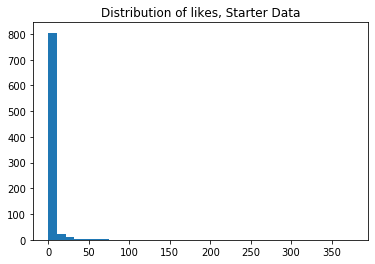

In [96]:
plt.hist(tweet_data["favorite_count"], bins = 35)
plt.title("Distribution of likes, Starter Data")
plt.show()

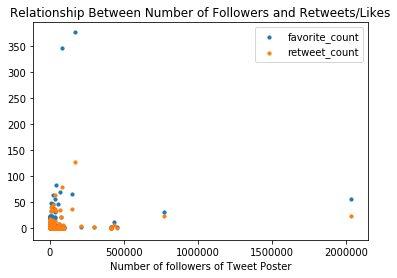

In [97]:
plt.scatter("followers_count", "favorite_count", data = tweet_data, label = "favorite_count", s = 10)
plt.scatter("followers_count", "retweet_count", data = tweet_data, label = "retweet_count", s = 10)
plt.xlabel("Number of followers of Tweet Poster")
plt.title("Relationship Between Number of Followers and Retweets/Likes")
plt.legend()
plt.show()

### The Top 20 Tweeters

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128167 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127987 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Run

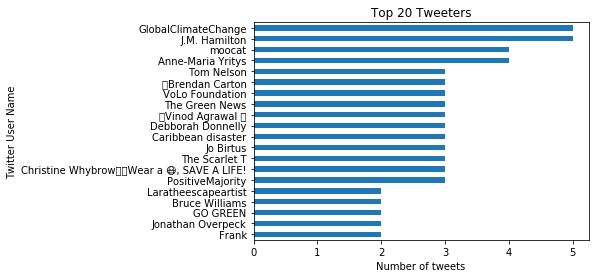

In [98]:
users = tweet_data['user name'].value_counts().sort_values()
users[-20:].plot.barh()
plt.title("Top 20 Tweeters")
plt.ylabel("Twitter User Name")
plt.xlabel("Number of tweets")
plt.show()

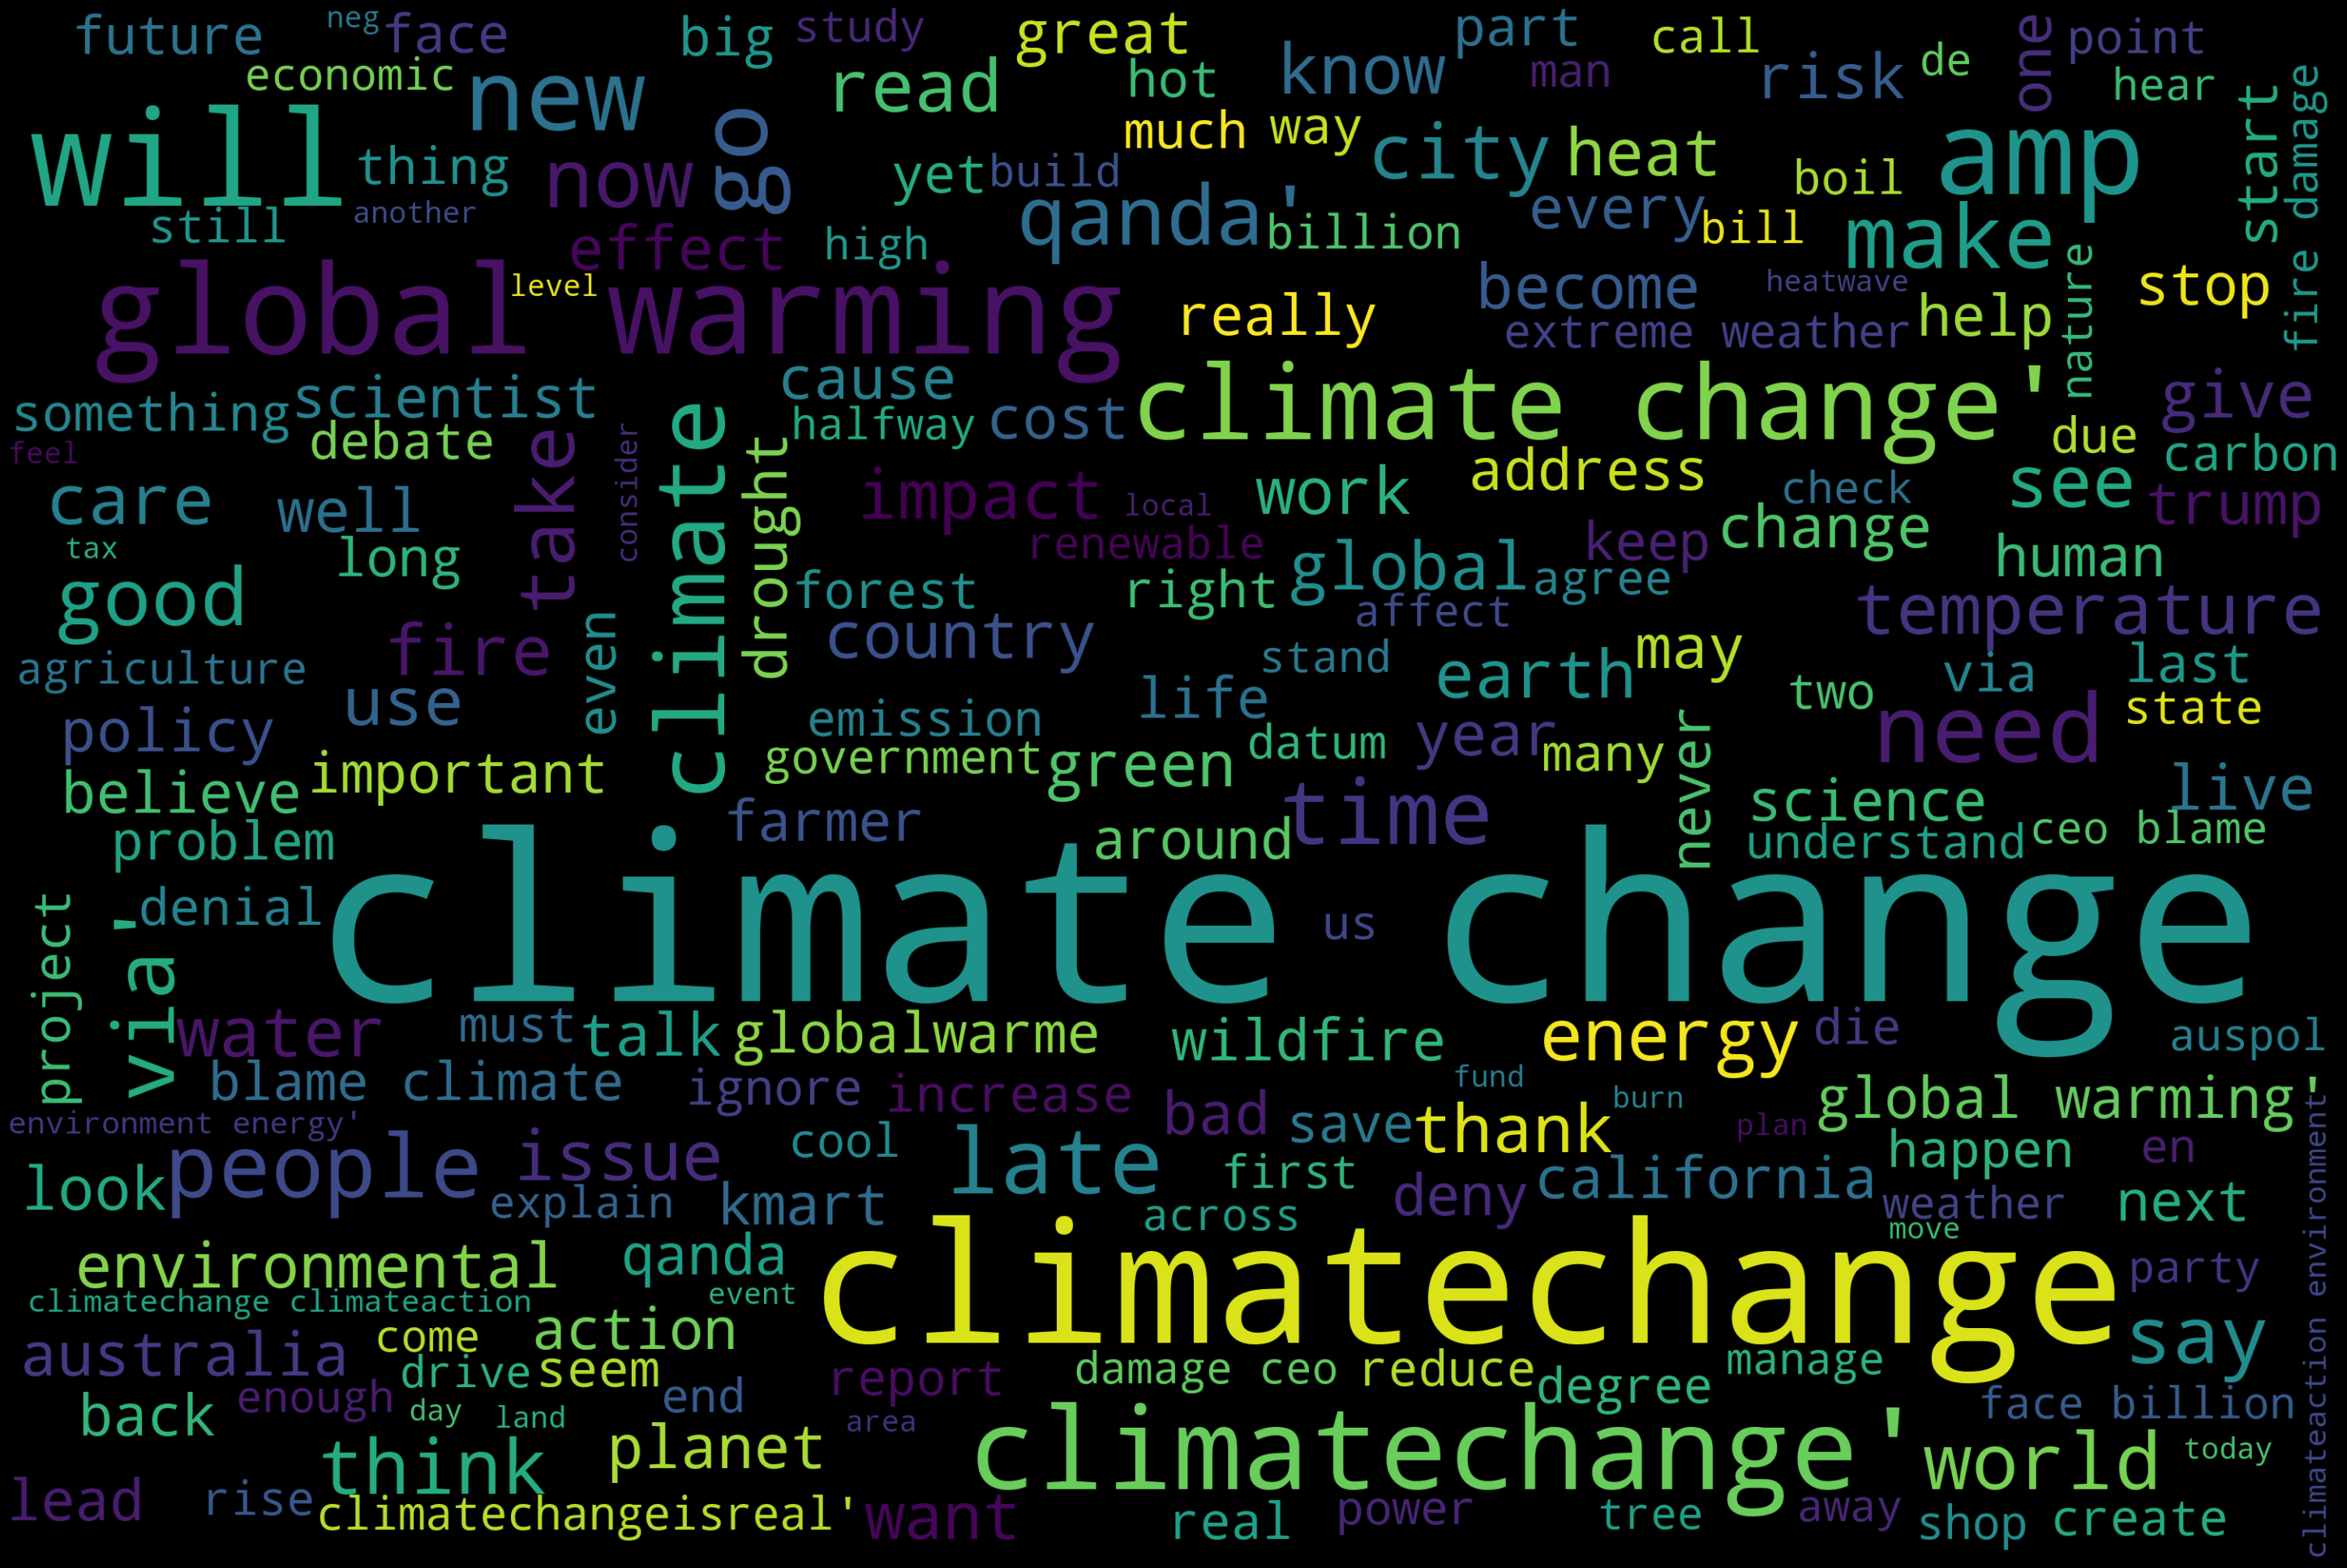

In [99]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
text = tweet_data.lemmatized.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Sentiment Analysis

In [29]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/haleymassa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_sentiment = tweet_data.copy()

# instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentiment_scores = df_sentiment['lemmatized'].progress_apply(
                                                            sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
df_sentiment['sentiment'] = sentiment

100%|██████████| 852/852 [00:00<00:00, 3390.54it/s]


In [32]:
df_sentiment.head()

created_at                   id  \
0 2018-08-13 10:39:52+00:00  1028954283822260225   
1 2018-08-13 10:39:54+00:00  1028954290893799428   
5 2018-08-13 10:40:00+00:00  1028954314490798080   
6 2018-08-13 10:40:00+00:00  1028954314998509570   
7 2018-08-13 10:40:02+00:00  1028954321864601600   

                                           full_text  retweet_count  \
0  An eye-opening article. This further reinforce...              0   
1  Bangladesh Confronts Climate Change - book goe...              0   
5  Scientist calls out media ‘misinformation’ on ...              1   
6  In the latest edition of The Ripon Forum, @Col...              5   
7  @GeneMcVay Help save the Sasquatch and nip glo...              6   

   favorite_count display_text_range Hashtags  \
0               0           [0, 146]       []   
1               0            [0, 83]       []   
5               1            [0, 98]       []   
6               8           [0, 180]       []   
7               7           [11, 69]       []   

                            Mentions  \
0                        [EamonRyan]   
1                                 []   
5                                 []   
6  [ColoradoStateU, airscottdenning]   
7                        [GeneMcVay]   

                                                URLS  followers_count  \
0                          [https://t.co/kZHZCOKCsR]               19   
1  [https://t.co/X5zgf9lYST, https://t.co/dowjnig...             1342   
5                          [https://t.co/wvaLlY54na]             1533   
6  [https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...             9150   
7                                                 []             8311   

   friends_count            user name     screen name          location  \
0             29          Smart Green        Enviato1       Pune, India   
1           4783         Dr Venkatesh  bangalorerobot  Bengaluru, India   
5           1160  IL Family Institute    ProFamilyIFI          Illinois   
6            876    The Ripon Society    RiponSociety    Washington, DC   
7           7934       Arkansas World   ArkansasWorld          Arkansas   

  user-country_code                                              token  emoji  \
0                in  an eyeopening article this further reinforces ...  False   
1                in  bangladesh confronts climate change  book goes...  False   
5                us  scientist calls out media misinformation on wi...  False   
6                us  in the latest edition of the ripon forum  prof...  False   
7                us   help save the sasquatch and nip global warmin...  False   

                                          lemmatized  \
0  an eyeopening article this further reinforce t...   
1  bangladesh confront climate change book go ope...   
5  scientist call out medium misinformation on wi...   
6  in the late edition of the ripon forum profess...   
7  help save the sasquatch and nip global warming...   

                                          final_text  sentiment  
0  [eyeopening, article, reinforce, need, switch,...     0.8008  
1  [bangladesh, confront, climate, change, book, ...    -0.1779  
5  [scientist, call, medium, misinformation, wild...    -0.1779  
6  [late, edition, ripon, forum, professor, expla...     0.0000  
7  [help, save, sasquatch, nip, global, warming, ...     0.7579

## Text Blob Sentiment Analysis

In [33]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data = tweet_data.copy()

data['polarity'] = data['lemmatized'].apply(pol)
data['subjectivity'] = data['lemmatized'].apply(sub)
data

created_at                   id  \
0    2018-08-13 10:39:52+00:00  1028954283822260225   
1    2018-08-13 10:39:54+00:00  1028954290893799428   
5    2018-08-13 10:40:00+00:00  1028954314490798080   
6    2018-08-13 10:40:00+00:00  1028954314998509570   
7    2018-08-13 10:40:02+00:00  1028954321864601600   
...                        ...                  ...   
2672 2018-08-13 12:00:32+00:00  1028974583813156865   
2673 2018-08-13 12:00:36+00:00  1028974600300969985   
2675 2018-08-13 12:00:42+00:00  1028974625823367168   
2679 2018-08-13 12:00:49+00:00  1028974653866483712   
2680 2018-08-13 12:00:53+00:00  1028974669951627265   

                                              full_text  retweet_count  \
0     An eye-opening article. This further reinforce...              0   
1     Bangladesh Confronts Climate Change - book goe...              0   
5     Scientist calls out media ‘misinformation’ on ...              1   
6     In the latest edition of The Ripon Forum, @Col...              5   
7     @GeneMcVay Help save the Sasquatch and nip glo...              6   
...                                                 ...            ...   
2672  Lakehead researcher gets $400K to study climat...              0   
2673  All time heat record in @GlacierNPS \nThis is ...              0   
2675  Study: SF has highest percentage of people who...              0   
2679  Not even talking about the #TradeWars already ...              1   
2680  @DindiOhh @jscottgood @Morning_Joe @FoxNews @v...              0   

      favorite_count display_text_range                       Hashtags  \
0                  0           [0, 146]                             []   
1                  0            [0, 83]                             []   
5                  1            [0, 98]                             []   
6                  8           [0, 180]                             []   
7                  7           [11, 69]                             []   
...              ...                ...                            ...   
2672               0           [0, 105]            [lokol, thunderbay]   
2673               0           [0, 168]  [climatechange, FindYourPark]   
2675               0           [0, 104]                             []   
2679               1            [0, 99]                    [TradeWars]   
2680               0         [221, 504]                             []   

                                               Mentions  \
0                                           [EamonRyan]   
1                                                    []   
5                                                    []   
6                     [ColoradoStateU, airscottdenning]   
7                                           [GeneMcVay]   
...                                                 ...   
2672                                                 []   
2673                                       [GlacierNPS]   
2675                                                 []   
2679                                                 []   
2680  [DindiOhh, jscottgood, Morning_Joe, FoxNews, v...   

                                                   URLS  followers_count  ...  \
0                             [https://t.co/kZHZCOKCsR]               19  ...   
1     [https://t.co/X5zgf9lYST, https://t.co/dowjnig...             1342  ...   
5                             [https://t.co/wvaLlY54na]             1533  ...   
6     [https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...             9150  ...   
7                                                    []             8311  ...   
...                                                 ...              ...  ...   
2672                          [https://t.co/nI2nY0zOV2]               43  ...   
2673                          [https://t.co/jnVIJETfJ5]              254  ...   
2675                          [https://t.co/lLsdUqYIAL]             2621  ...   
2679                          [https://t.co/6PsD2kPKuK]       

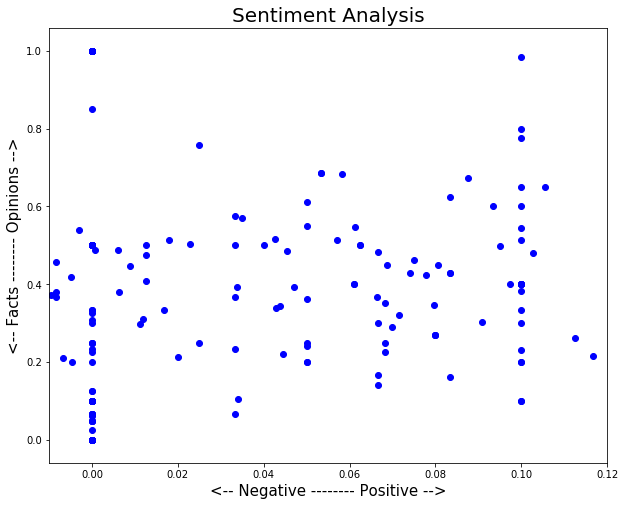

In [34]:
# Let's plot the results
import matplotlib.pyplot as plt

data.reset_index()

plt.rcParams['figure.figsize'] = [10, 8]

for index, tweet in enumerate(data.index):
    x = data.polarity.loc[tweet]
    y = data.subjectivity.loc[tweet]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['user name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [35]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['polarity'].apply(getAnalysis)
# Show the dataframe
data

created_at                   id  \
0    2018-08-13 10:39:52+00:00  1028954283822260225   
1    2018-08-13 10:39:54+00:00  1028954290893799428   
5    2018-08-13 10:40:00+00:00  1028954314490798080   
6    2018-08-13 10:40:00+00:00  1028954314998509570   
7    2018-08-13 10:40:02+00:00  1028954321864601600   
...                        ...                  ...   
2672 2018-08-13 12:00:32+00:00  1028974583813156865   
2673 2018-08-13 12:00:36+00:00  1028974600300969985   
2675 2018-08-13 12:00:42+00:00  1028974625823367168   
2679 2018-08-13 12:00:49+00:00  1028974653866483712   
2680 2018-08-13 12:00:53+00:00  1028974669951627265   

                                              full_text  retweet_count  \
0     An eye-opening article. This further reinforce...              0   
1     Bangladesh Confronts Climate Change - book goe...              0   
5     Scientist calls out media ‘misinformation’ on ...              1   
6     In the latest edition of The Ripon Forum, @Col...              5   
7     @GeneMcVay Help save the Sasquatch and nip glo...              6   
...                                                 ...            ...   
2672  Lakehead researcher gets $400K to study climat...              0   
2673  All time heat record in @GlacierNPS \nThis is ...              0   
2675  Study: SF has highest percentage of people who...              0   
2679  Not even talking about the #TradeWars already ...              1   
2680  @DindiOhh @jscottgood @Morning_Joe @FoxNews @v...              0   

      favorite_count display_text_range                       Hashtags  \
0                  0           [0, 146]                             []   
1                  0            [0, 83]                             []   
5                  1            [0, 98]                             []   
6                  8           [0, 180]                             []   
7                  7           [11, 69]                             []   
...              ...                ...                            ...   
2672               0           [0, 105]            [lokol, thunderbay]   
2673               0           [0, 168]  [climatechange, FindYourPark]   
2675               0           [0, 104]                             []   
2679               1            [0, 99]                    [TradeWars]   
2680               0         [221, 504]                             []   

                                               Mentions  \
0                                           [EamonRyan]   
1                                                    []   
5                                                    []   
6                     [ColoradoStateU, airscottdenning]   
7                                           [GeneMcVay]   
...                                                 ...   
2672                                                 []   
2673                                       [GlacierNPS]   
2675                                                 []   
2679                                                 []   
2680  [DindiOhh, jscottgood, Morning_Joe, FoxNews, v...   

                                                   URLS  followers_count  ...  \
0                             [https://t.co/kZHZCOKCsR]               19  ...   
1     [https://t.co/X5zgf9lYST, https://t.co/dowjnig...             1342  ...   
5                             [https://t.co/wvaLlY54na]             1533  ...   
6     [https://t.co/IFwD5pTHtr, https://t.co/2rzD3k7...             9150  ...   
7                                                    []             8311  ...   
...                                                 ...              ...  ...   
2672                          [https://t.co/nI2nY0zOV2]               43  ...   
2673                          [https://t.co/jnVIJETfJ5]              254  ...   
2675                          [https://t.co/lLsdUqYIAL]             2621  ...   
2679                          [https://t.co/6PsD2kPKuK]       

In [36]:
data = data.reset_index()

In [37]:
# Printing negative tweets  
data.reset_index()
print('Printing negative tweets:\n')
j=1
sortedDF = data.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF.Analysis[i] == 'Negative'):
        print(str(j) + ') '+sortedDF['full_text'][i])
        print()
        j=j+1

Printing negative tweets:

1) In the latest edition of The Ripon Forum, @ColoradoStateU professor @airscottdenning explains why "The Science is Settled" when it comes to climate change - https://t.co/IFwD5pTHtr https://t.co/2rzD3k76fB

2) @Jandy232 @carolemorrissey I’m assuming he thinks he’ll be dead by the time the planet’s uninhabitable &amp; there’s no evidence @TonyAbbottMHR cares about anyone other than himself – he must really hate his daughters though #auspol #ClimateChange

3) Oh well, they deal with it quite well. Like they add numbers and facts and such crazy stuff.
https://t.co/DuBGmHCnG8
#climatechange https://t.co/d5IBchM3Uk

4) @Havenaar64 The last time you asked me this I responded with https://t.co/mARfQsjrzT but you refused to open the link because of a prejudice that it would be lies and propaganda.

5) We're dangerously unprepared for the heat crisis from climate change! #climatechange #HeatWave2018 #future  https://t.co/OIjIz1qCDN

6) #Alaska's #NorthSlope hit by s

In [38]:
# Printing negative tweets  
data.reset_index()
print('Printing positive tweets:\n')
j=1
sortedDF = data.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF.Analysis[i] == 'Positive'):
        print(str(j) + ') '+sortedDF['full_text'][i])
        print()
        j=j+1

Printing positive tweets:

1) An eye-opening article. This further reinforces the need to switch to a more enviroment friendly lifestyle.
@EamonRyan thank you for sharing this! https://t.co/kZHZCOKCsR

2) Just as it is worth remembering the next time someone insists there is no clear link between climate change and migration and security risks.

3) Gotta love the facts. https://t.co/bZ2G8AZuo9

4) @jonkudelka Harvey Norman reckons climate change is bunkum because his mates who own coal companies need people to buy polluting stuff

5) How humans — and climate change — make wildfires even more deadly - ⁦@washingtonpost⁩ nails this piece (just like every other climate change piece they take on) 🙌🏼 #madrespect https://t.co/GhzNePkq8q

6) IRP and Provincial Disaster Management Authority Balochistan signed a Memorandum of Understanding (MoU) for concrete policy frameworks to address the impacts of #climate #change in Balochistan. @IRWorldwide @IslamicReliefSv #drought @VOCC_Advocacy https://

In [39]:
# Print the percentage of positive tweets
ptweets = data[data.Analysis == 'Positive']
ptweets = ptweets['full_text']
ptweets

round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

39.3

In [40]:
# Print the percentage of negative tweets
ptweets = data[data.Analysis == 'Negative']
ptweets = ptweets['full_text']
ptweets

round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

22.2

# EDA With New Sentiment Analysis

## Negative Data

In [41]:
negative_data = new = data[data.Analysis.str.contains("Negative") == True]

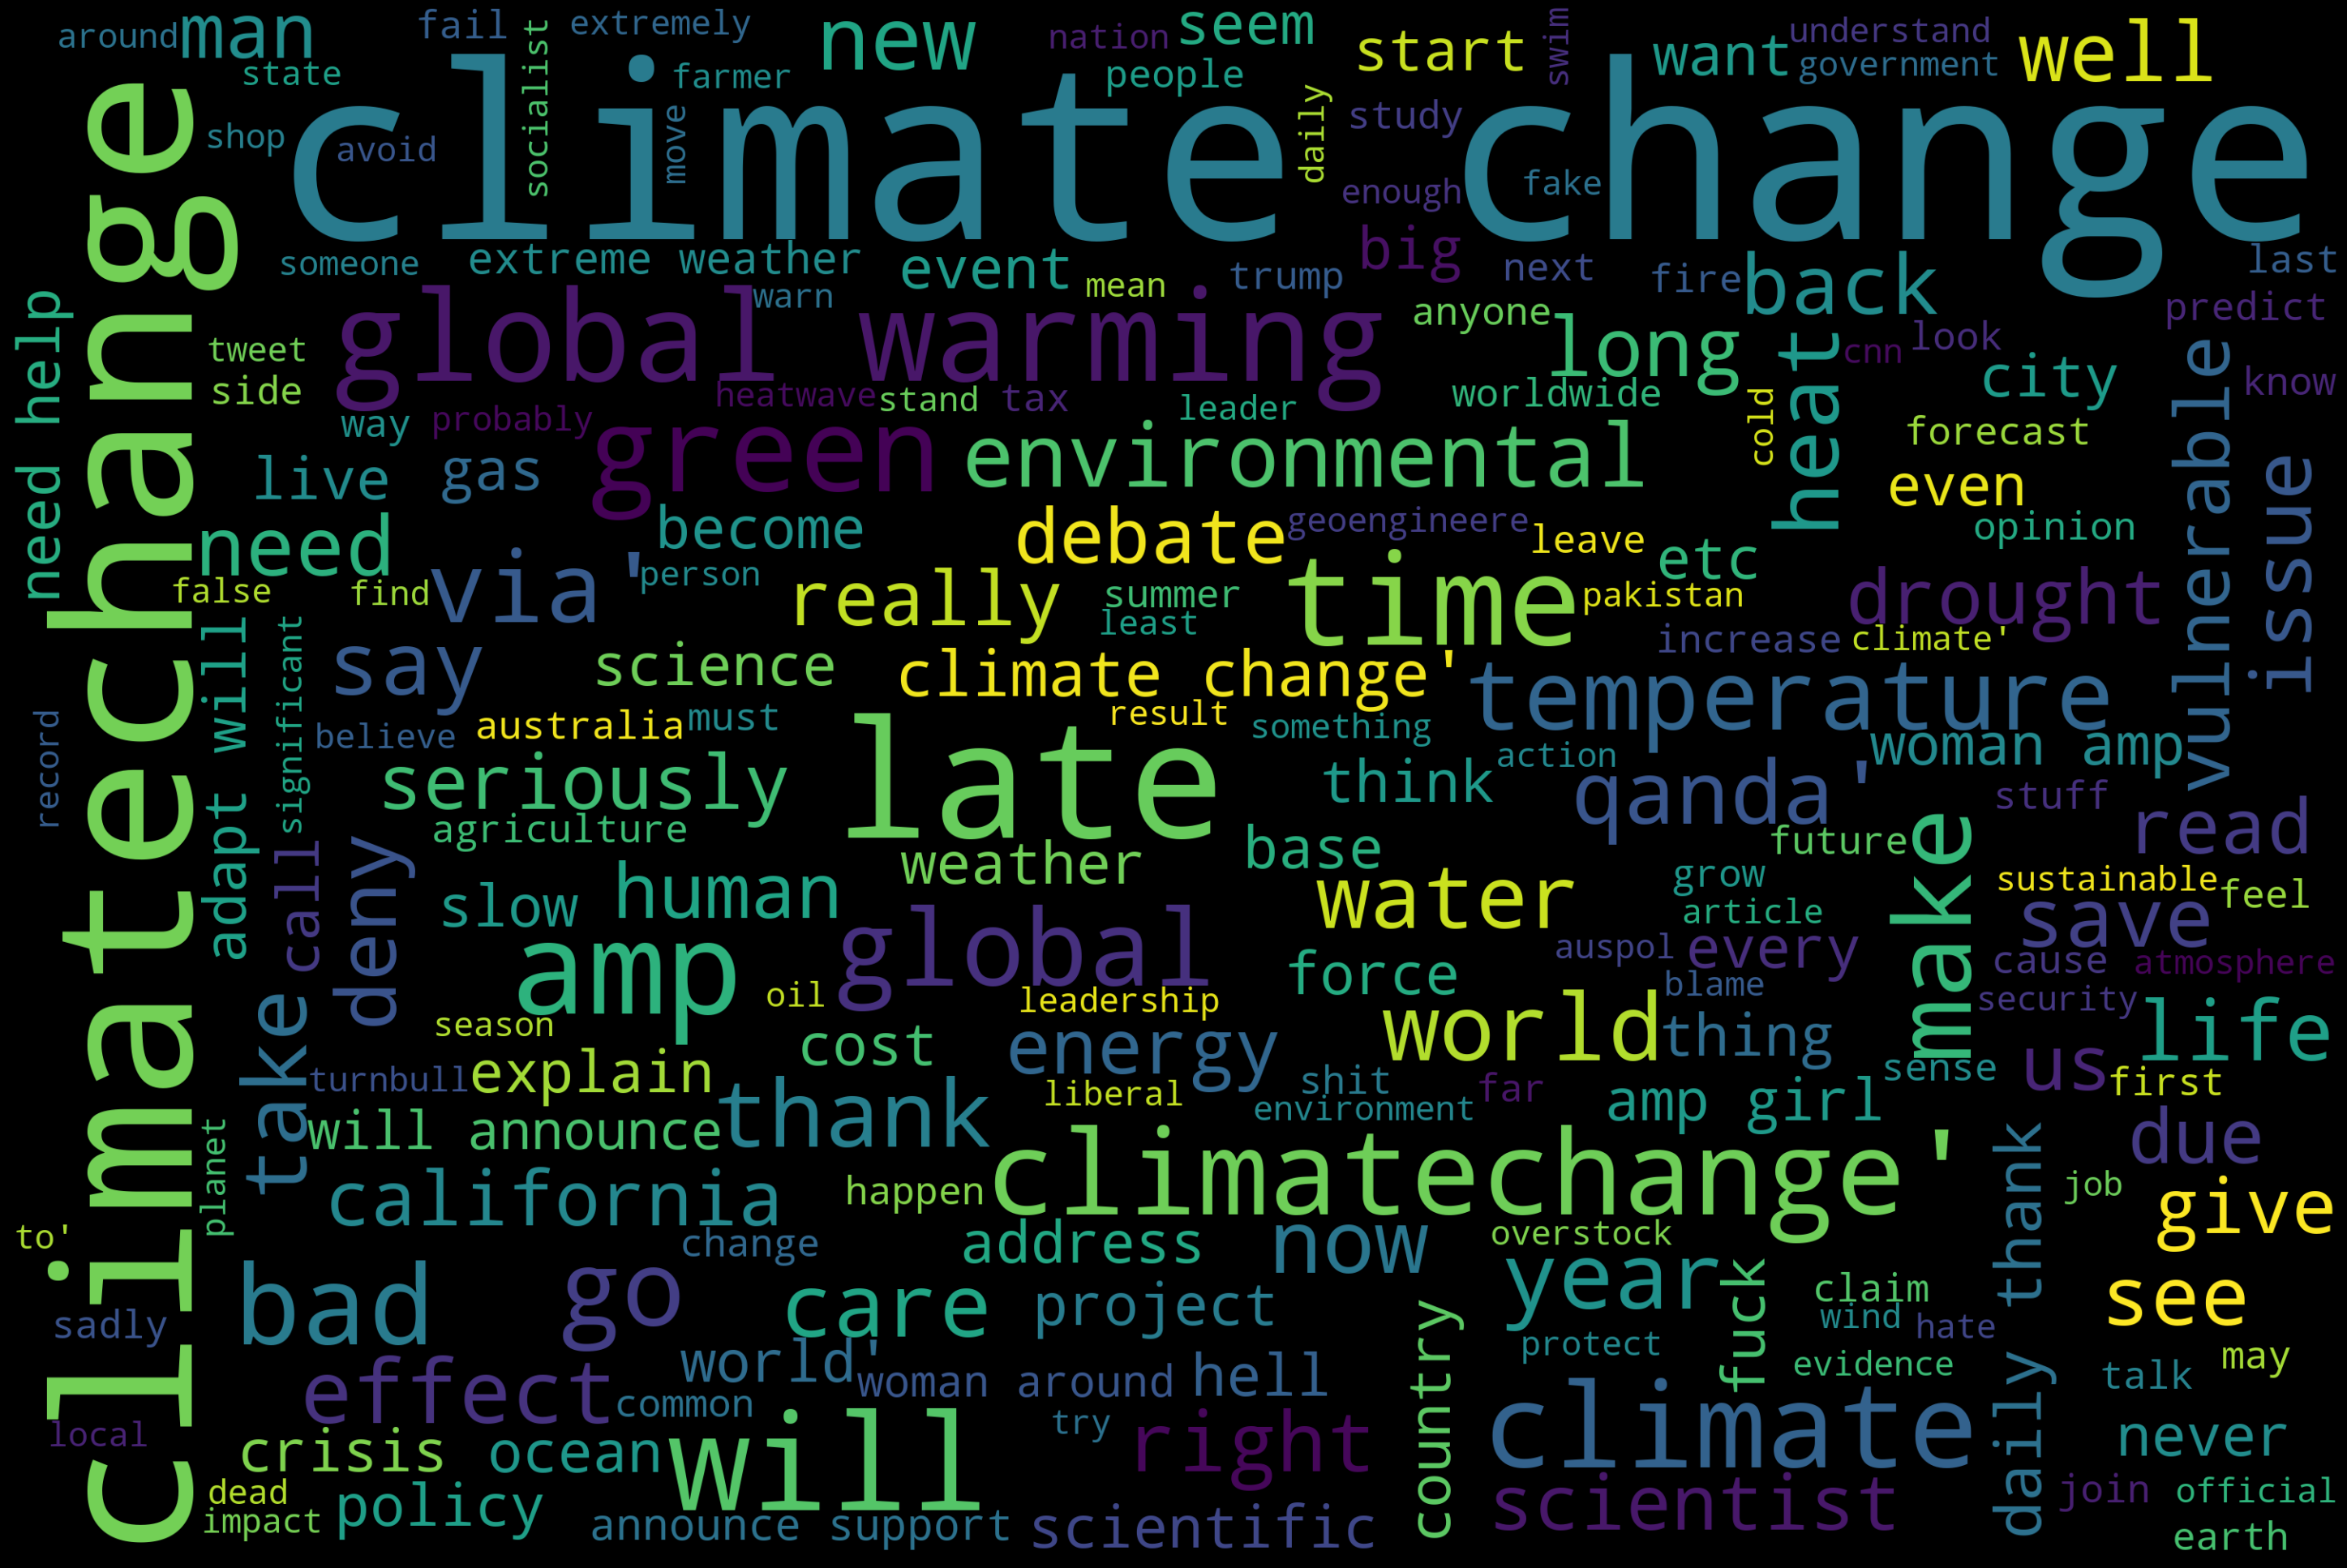

In [42]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
text = negative_data.lemmatized.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

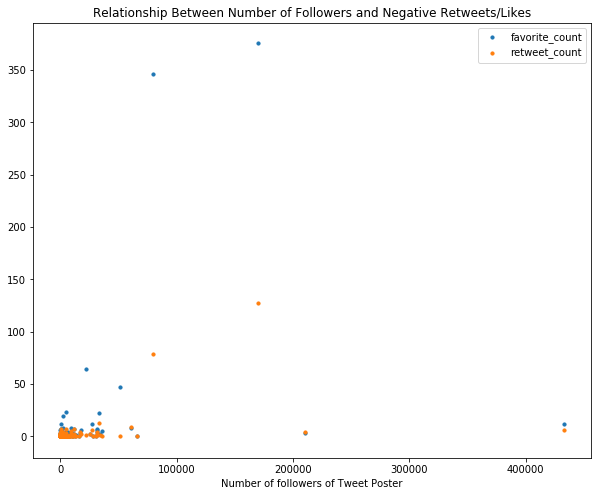

In [43]:
plt.scatter("followers_count", "favorite_count", data = negative_data, label = "favorite_count", s = 10)
plt.scatter("followers_count", "retweet_count", data = negative_data, label = "retweet_count", s = 10)
plt.xlabel("Number of followers of Tweet Poster")
plt.title("Relationship Between Number of Followers and Negative Retweets/Likes")
plt.legend()
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: R

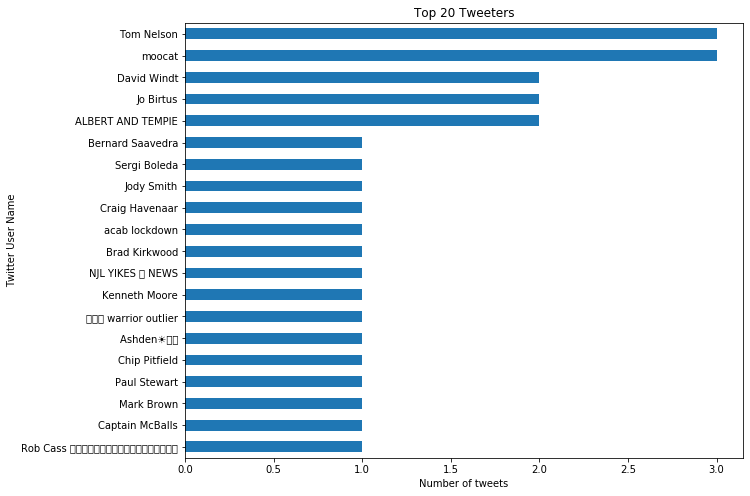

In [44]:
users = negative_data['user name'].value_counts().sort_values()
users[-20:].plot.barh()
plt.title("Top 20 Tweeters")
plt.ylabel("Twitter User Name")
plt.xlabel("Number of tweets")
plt.show()

# Bot or Not

# Topic Modeling

In [45]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

NameError: name 'data_clean' is not defined